# Creating dataset with multiple series

## Objective

## Steps

1) Load the Dataset
2) Visualize
3) Model Training

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta

In [2]:
#df_info = pd.read_csv('ico_info_table_2020-08-08.csv', sep=',')
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')



In [3]:
df_info

ico                                      adress  fraud  \
0             0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0   
1           AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0   
2     AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0   
3           ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0   
4         BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0   
..           ...                                         ...    ...   
253  TRADEXTOKEN  0x5432c580e34f590f4dd901b825ddeb92e905e826      1   
254  TRONCLASSIC  0xad5fe5b0b8ec8ff4565204990e4405b2da117d8e      1   
255  WALTONCHAIN  0xb7cb1c96db6b22b0d3d9536e0108d062bd488f74      1   
256         ZPAY  0xeffea57067e02999fdcd0bb45c0f1071a29472d9      1   
257     ZYNECOIN  0xe65ee7c03bbb3c950cfd4895c24989afa233ef01      1   

     start_date market_start_date  diff_days  market_days size_ok price_zero  \
0    2017-11-08        2017-08-15          4         1140     NaN        NaN   
1    2017-12-18        2017-12-21          3         1012     NaN        NaN   
2    2019-06-14        2019-06-27         13          459     NaN        NaN   
3    2019-02-21        2019-05-03         12          573     NaN        NaN   
4    2017-10-06        2017-12-06          2         1204     NaN        NaN   
..          ...               ...        ...          ...     ...        ...   
253  2020-01-24        2020-03-26         62          186     NaN        NaN   
254  2018-08-05        2018-08-10        153          721       x          x   
255  2017-07-21        2017-07-23          2         1163       x        NaN   
256  2018-07-25        2018-08-20         26          770       x        NaN   
257  2019-01-21        2019-01-23          2          614       x        NaN   

     Market Cap o_concur  biggest_holder  exchange  contract date_analysis  \
0          45.0        x               2         6        14    2018-11-02   
1         154.0        x              13        10         0    2018-06-19   
2          47.0        x               3         4        20    2019-12-24   
3         170.0        x              11         7        41    2019-01-09   
4          61.0        x               2        11         7    2017-09-12   
..          ...      ...             ...       ...       ...           ...   
253         NaN      NaN              98         0         0    2020-09-22   
254         NaN      NaN              30        13         1    2019-06-04   
255         NaN      NaN              61         4         0    2018-01-19   
256         NaN      NaN              99         0         0    2019-02-16   
257         NaN      NaN              15         2         0    2019-07-22   

    code site social_media  
0    NaN  NaN          NaN  
1    NaN  NaN          NaN  
2    NaN  NaN          NaN  
3    NaN  NaN          NaN  
4    NaN  NaN          NaN  
..   ...  ...          ...  
253  NaN  NaN          NaN  
254    x    x          NaN  
255    x    x            x  
256  NaN  NaN          NaN  
257    x    x            x  

[258 rows x 18 columns]

In [4]:
df_info.ico = df_info.ico.str.upper()

In [5]:
df_info.ico = df_info.ico.str.replace(' ', '')

In [6]:
df_info.head(250)

ico                                      adress  fraud  \
0              0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0   
1            AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0   
2      AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0   
3            ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0   
4          BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0   
..            ...                                         ...    ...   
245     SPARKSTER  0x971d048e737619884f2df75e31c7eb6412392328      1   
246  STOPTHEFAKES  0x64be6b77cc723e5518687a04b4e62824e89fd8bb      1   
247          STOX  0x006bea43baa3f7a6f765f14f10a1a1b08334ef45      1   
248        TATATU  0x9cda8a60dd5afa156c95bd974428d91a0812e054      1   
249        TAYLOR  0xc4d557d795ce16c49624e48045b380f169e4113f      1   

     start_date market_start_date  diff_days  market_days size_ok price_zero  \
0    2017-11-08        2017-08-15          4         1140     NaN        NaN   
1    2017-12-18        2017-12-21          3         1012     NaN        NaN   
2    2019-06-14        2019-06-27         13          459     NaN        NaN   
3    2019-02-21        2019-05-03         12          573     NaN        NaN   
4    2017-10-06        2017-12-06          2         1204     NaN        NaN   
..          ...               ...        ...          ...     ...        ...   
245  2018-07-22        2018-07-22          0          799       x        NaN   
246  2018-01-23        2018-04-25         92          887       x          x   
247  2017-01-08        2017-02-08          1         1153       x        NaN   
248  2018-10-04        2018-07-31        112          790       x        NaN   
249  2018-02-20        2018-02-21          1          950       x          x   

     Market Cap o_concur  biggest_holder  exchange  contract date_analysis  \
0          45.0        x               2         6        14    2018-11-02   
1         154.0        x              13        10         0    2018-06-19   
2          47.0        x               3         4        20    2019-12-24   
3         170.0        x              11         7        41    2019-01-09   
4          61.0        x               2        11         7    2017-09-12   
..          ...      ...             ...       ...       ...           ...   
245         NaN      NaN              52         2        27    2019-01-18   
246         NaN      NaN              21         0        62    2018-10-22   
247         NaN      NaN               6        19         6    2018-01-29   
248         NaN      NaN              39         0         0    2019-01-27   
249         NaN      NaN               6         0        19    2018-08-20   

    code site social_media  
0    NaN  NaN          NaN  
1    NaN  NaN          NaN  
2    NaN  NaN          NaN  
3    NaN  NaN          NaN  
4    NaN  NaN          NaN  
..   ...  ...          ...  
245  NaN  NaN          NaN  
246    x    x          NaN  
247    x    x          NaN  
248  NaN    x            x  
249    x    x          NaN  

[250 rows x 18 columns]

## 2. Importing the `ICOParser` class

In [7]:
from ico_parser import ICOParser

In [8]:
#help(ICOParser)

## 3. Creating the dataset

In [26]:
path_to_files = '/home/gabriel/Documents/Repos/time_series_study/data_and_models/all_icos'

In [27]:
title_search = re.search('(\w+)_T', 'STOX_T_COMPLETO.csv', re.IGNORECASE)
title_search.group(1)

'STOX'

### 3.1. Renaming files

In [28]:
import os
os.listdir(path_to_files)[:5]

['LAMONEDA.csv',
 'ORIGINTRAIL.csv',
 'MONEYTOKEN.csv',
 'TIERION.csv',
 'CELSIUS.csv']

In [29]:
files_ready = True

In [30]:
if not files_ready:
    for csv in sorted(os.listdir(path_to_files)):
        ico_name_search = re.search('(\w+)_T_', csv, re.IGNORECASE)
        if re.search('(\w+)_T_', csv, re.IGNORECASE):
            print(csv)#, ico_name)
            ico_name = ico_name_search.group(1)
            os.rename(f'{path_to_files}{csv}',f'{path_to_files}{ico_name}.csv') 

### 3.1. Iterating through the files

In [31]:
df_info.head()

ico                                      adress  fraud  start_date  \
0          0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  2017-11-08   
1        AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  2017-12-18   
2  AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0  2019-06-14   
3        ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0  2019-02-21   
4      BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0  2017-10-06   

  market_start_date  diff_days  market_days size_ok price_zero  Market Cap  \
0        2017-08-15          4         1140     NaN        NaN        45.0   
1        2017-12-21          3         1012     NaN        NaN       154.0   
2        2019-06-27         13          459     NaN        NaN        47.0   
3        2019-05-03         12          573     NaN        NaN       170.0   
4        2017-12-06          2         1204     NaN        NaN        61.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    2018-11-02  NaN  NaN   
1        x              13        10         0    2018-06-19  NaN  NaN   
2        x               3         4        20    2019-12-24  NaN  NaN   
3        x              11         7        41    2019-01-09  NaN  NaN   
4        x               2        11         7    2017-09-12  NaN  NaN   

  social_media  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [32]:
sorted(os.listdir(path_to_files))[:3]

['0X.csv', '0XCERT.csv', '4NEW.csv']

## Checking information about files

In [33]:
dict_target = {}
for csv in sorted(os.listdir(path_to_files)):
    try:
        #print(csv)
        current_row_list = []
        ico_name = re.search('(\w+).csv', csv, re.IGNORECASE).group(1)
        current_row_list.append(ico_name)
        ico_info_row = df_info.loc[df_info.ico == ico_name]
        ico_start_date = ico_info_row.at[ico_info_row.index[0], 'market_start_date']
        fraud_label = ico_info_row.at[ico_info_row.index[0], 'fraud']
        
        #print(ico_start_date, fraud_label)
        dict_target[ico_name] = fraud_label
        
    except:
        print(f'ERRO NO ARQUIVO: {csv}')

ERRO NO ARQUIVO: EMTOKEN.csv


File `EMTOKEN.csv` has no information about.

## Gerando o Dataset

In [34]:
f'{path_to_files}/{csv}'


'/home/gabriel/Documents/Repos/time_series_study/data_and_models/all_icos/ZYNECOIN.csv'

In [38]:
ico_parser = ICOParser(path_to_csv,
                 date_column='BLOCK_TIMESTAMP',
                 value_column='VALUE',
                 ico_start_date=ico_start_date, 
                 fraud_flag=fraud_label)

In [40]:
%%time
ico_parser.pipeline()

Running method: define_ico_start_date ... 
Running method: get_newbiers_dataframe ... 
Running method: get_balance ... 
2017-08-11
63
Running method: get_cumsum_balance ... 
Running method: get_cumsum_daily_percentage ... 
Running method: get_daily_number_of_new_holder ... 
Running method: get_array_daily_transactions ... 
Running method: get_array_perc_new_holders ... 
Running method: get_biggest_holder_dict ... 
Running method: get_biggest_holder_array ... 
Running method: get_newbiers_ratio_dict ... 
Running method: get_newbiers_array ... 
Running method: get_gas_ratio_array ... 
CPU times: user 4min 32s, sys: 1.37 s, total: 4min 33s
Wall time: 11min 39s


In [44]:
dict_dataset['ico_name'] = [ico_parser.array_daily_transactions,
ico_parser.array_perc_new_holders,
ico_parser.array_biggest_holder,
ico_parser.array_newbiers,
ico_parser.array_gas_ratio]

In [53]:
len(dict_dataset.keys())

145

In [48]:
dict_dataset = {}

In [ ]:
# Iterate over files extracting data
for csv in sorted(os.listdir(path_to_files))[20:]:
    try:
        print(csv)
        current_row_list = []
        ico_name = re.search('(\w+).csv', csv, re.IGNORECASE).group(1)
        current_row_list.append(ico_name)
        ico_info_row = df_info.loc[df_info.ico == ico_name]
        ico_start_date = ico_info_row.at[ico_info_row.index[0], 'market_start_date']
        fraud_label = ico_info_row.at[ico_info_row.index[0], 'fraud']

        print(ico_start_date, fraud_label)
        path_to_csv = f'{path_to_files}/{csv}'
        ico_parser = ICOParser(path_to_csv,
                     date_column='BLOCK_TIMESTAMP',
                     value_column='VALUE',
                     ico_start_date=ico_start_date, 
                     fraud_flag=fraud_label)

        ico_parser.pipeline()
        dict_dataset[ico_name] = [ico_parser.array_daily_transactions,
                                    ico_parser.array_perc_new_holders,
                                    ico_parser.array_biggest_holder,
                                    ico_parser.array_newbiers,
                                    ico_parser.array_gas_ratio]
        """
        ico_parser.define_ico_start_date()
        ico_parser.get_array_daily_transactions()
        dict_perc_daily_transactions[ico_name] = ico_parser.array_daily_transactions
        """    

    except:
        print(f'ERRO NO ARQUIVO: {csv}')

### Filter dictionary based on length of array
```python
for k,v in dict_perc_daily_transactions.items():
    print(k, len(v))
```

In [47]:
dict_perc_daily_transactions_60 = {k:v for k,v in dict_perc_daily_transactions.items() if len(v) == 60}

In [48]:
pd.DataFrame(dict_perc_daily_transactions_60)

0X  0XCERT    4NEW  ABULABA    AELF   AERGO  AIDCOIN  AIRSWAP  \
0   0.1390  0.1095  0.3057   0.2587  0.0322  0.0488   0.1536   0.2162   
1   0.2679  0.1870  0.4940   0.2776  0.0391  0.0916   0.2434   0.2899   
2   0.3285  0.3852  0.5153   0.2859  0.0437  0.2587   0.6591   0.2914   
3   0.3868  0.4327  0.5365   0.3079  0.0492  0.3070   0.9297   0.2923   
4   0.4731  0.6890  0.5481   0.3147  0.0554  0.3268   0.9302   0.2929   
5   0.4980  0.8694  0.5552   0.3207  0.0640  0.3435   0.9306   0.2930   
6   0.5180  0.8997  0.5605   0.3275  0.0726  0.3542   0.9308   0.2930   
7   0.5341  0.9021  0.5705   0.3313  0.0791  0.3608   0.9308   0.5470   
8   0.5536  0.9048  0.5828   0.3548  0.0858  0.3670   0.9308   0.6076   
9   0.5689  0.9084  0.5897   0.3676  0.0926  0.3728   0.9308   0.6558   
10  0.5843  0.9095  0.5959   0.3797  0.0981  0.3810   0.9308   0.6770   
11  0.6022  0.9122  0.6097   0.3911  0.1043  0.5801   0.9308   0.6894   
12  0.6121  0.9162  0.6176   0.3964  0.1124  0.6016   0.9308   0.6984   
13  0.6272  0.9195  0.6283   0.4228  0.1234  0.6084   0.9308   0.7085   
14  0.6410  0.9224  0.6341   0.4372  0.1423  0.6143   0.9308   0.7199   
15  0.6580  0.9242  0.6431   0.4395  0.5455  0.6168   0.9308   0.7272   
16  0.6723  0.9276  0.6557   0.4516  0.5573  0.6271   0.9308   0.7344   
17  0.6887  0.9309  0.6619   0.4660  0.5790  0.6341   0.9308   0.7401   
18  0.7007  0.9338  0.6717   0.4803  0.5922  0.6387   0.9308   0.7457   
19  0.7106  0.9345  0.6761   0.4955  0.6037  0.6406   0.9308   0.7505   
20  0.7309  0.9358  0.6812   0.5091  0.6163  0.6442   0.9308   0.7561   
21  0.7434  0.9374  0.6863   0.5166  0.6246  0.6484   0.9308   0.7608   
22  0.7544  0.9385  0.6930   0.5182  0.6386  0.6604   0.9308   0.7822   
23  0.7757  0.9394  0.7009   0.5242  0.6504  0.6683   0.9308   0.7943   
24  0.7875  0.9416  0.7089   0.5265  0.6597  0.6770   0.9308   0.7994   
25  0.7955  0.9423  0.7143   0.5325  0.6705  0.6809   0.9308   0.8050   
26  0.8028  0.9447  0.7198   0.5371  0.6810  0.6824   0.9308   0.8101   
27  0.8155  0.9461  0.7261   0.5424  0.6900  0.6847   0.9308   0.8141   
28  0.8258  0.9465  0.7310   0.5492  0.6997  0.6892   0.9308   0.8195   
29  0.8344  0.9494  0.7353   0.5499  0.7086  0.6940   0.9308   0.8249   
30  0.8442  0.9525  0.7423   0.5779  0.7190  0.7002   0.9308   0.8315   
31  0.8543  0.9541  0.7486   0.5946  0.7300  0.7048   0.9308   0.8368   
32  0.8604  0.9601  0.7528   0.6051  0.7384  0.7069   0.9308   0.8409   
33  0.8648  0.9623  0.7597   0.6384  0.7445  0.7153   0.9308   0.8445   
34  0.8719  0.9639  0.7666   0.6483  0.7611  0.7169   0.9308   0.8473   
35  0.8795  0.9681  0.7726   0.6619  0.7909  0.7198   0.9308   0.8519   
36  0.8851  0.9681  0.7767   0.6770  0.8045  0.7231   0.9308   0.8556   
37  0.8898  0.9706  0.7824   0.6921  0.8157  0.7298   0.9308   0.8604   
38  0.8942  0.9724  0.7880   0.7057  0.8260  0.7374   0.9308   0.8651   
39  0.8978  0.9728  0.7947   0.7247  0.8358  0.9196   0.9308   0.8676   
40  0.9016  0.9739  0.8010   0.7345  0.8462  0.9355   0.9308   0.8726   
41  0.9068  0.9750  0.8062   0.7882  0.8554  0.9418   0.9308   0.8783   
42  0.9118  0.9761  0.8477   0.8056  0.8756  0.9490   0.9308   0.8839   
43  0.9185  0.9777  0.8644   0.8109  0.8861  0.9519   0.9308   0.8923   
44  0.9240  0.9797  0.8796   0.8207  0.8940  0.9551   0.9308   0.8982   
45  0.9276  0.9811  0.8933   0.8457  0.9023  0.9610   0.9308   0.9012   
46  0.9316  0.9844  0.9023   0.8487  0.9128  0.9636   0.9308   0.9056   
47  0.9362  0.9851  0.9181   0.8540  0.9238  0.9673   0.9308   0.9102   
48  0.9408  0.9855  0.9309   0.8646  0.9323  0.9701   0.9308   0.9146   
49  0.9450  0.9868  0.9416   0.8699  0.9350  0.9743   0.9308   0.9196   
50  0.9490  0.9873  0.9509   0.8858  0.9458  0.9771   0.9308   0.9244   
51  0.9525  0.9889  0.9600   0.8911  0.9562  0.9788   0.9308   0.9300   
52  0.9570  0.9895  0.9652   0.8949  0.9646  0.9840   0.9308   0.9343   
53  0.9618  0.9902  0.9696   0.8994  0.9703  0.9869   0.9308   0.9

## 4. Plotting the dataset

In [15]:
import plotly.graph_objects as go

In [16]:
dataset_ready = True

In [17]:
if dataset_ready:
    df_dataset = pd.read_csv('../data_and_models/dataset_ico_2020-08-07.csv')

In [18]:
df_dataset

ico        0        1       2       3        4       5       6  \
0            0X  22670.0  21019.0  9884.0  9497.0  14077.0  4066.0  3265.0   
1        0XCERT   1053.0    646.0   158.0    93.0     57.0   247.0   114.0   
2          4NEW   5417.0   3336.0   377.0   376.0    206.0   126.0    93.0   
3       ABULABA    342.0     25.0    11.0    29.0      9.0     8.0     9.0   
4          AELF   1351.0    291.0   192.0   229.0    259.0   363.0   362.0   
..          ...      ...      ...     ...     ...      ...     ...     ...   
225         WAX   1228.0    591.0   746.0  1984.0    725.0   440.0   278.0   
226  WAYKICHAIN    886.0   3429.0  3945.0   756.0    437.0   334.0   458.0   
227     ZILLIQA    796.0   4240.0  3138.0  1236.0    902.0   873.0   737.0   
228        ZPAY   3956.0      9.0   505.0     9.0    273.0    84.0    53.0   
229    ZYNECOIN    147.0    129.0     2.0     3.0      0.0     0.0    14.0   

          7       8  ...     51      52     53      54     55      56      57  \
0    2618.0  3187.0  ...  585.0   729.0  783.0  1174.0  953.0  1139.0   882.0   
1     125.0    48.0  ...    9.0    14.0    4.0    16.0   26.0    13.0    18.0   
2     178.0   217.0  ...  161.0    93.0   78.0    74.0   39.0    55.0    87.0   
3       5.0    31.0  ...    7.0     5.0    6.0    14.0   31.0    18.0    20.0   
4     272.0   278.0  ...  439.0   353.0  236.0   162.0  191.0   288.0   183.0   
..      ...     ...  ...    ...     ...    ...     ...    ...     ...     ...   
225   189.0  1527.0  ...  380.0  1015.0  429.0   386.0  421.0   439.0  4573.0   
226   395.0   238.0  ...   63.0    77.0   96.0   160.0  144.0   144.0    98.0   
227   569.0   716.0  ...  718.0   557.0  613.0   607.0  521.0   789.0   463.0   
228    20.0    15.0  ...   11.0     3.0    2.0     0.0    2.0     1.0     3.0   
229     3.0     0.0  ...    3.0     4.0    6.0     8.0    4.0     3.0     5.0   

        58      59  is_fraud  
0    934.0  1144.0       0.0  
1      8.0    11.0       1.0  
2    167.0   116.0       1.0  
3     28.0    22.0       1.0  
4    218.0   205.0       0.0  
..     ...     ...       ...  
225  907.0   386.0       0.0  
226   90.0   107.0       0.0  
227  724.0   758.0       0.0  
228    1.0     1.0       1.0  
229   11.0     4.0       1.0  

[230 rows x 62 columns]

In [21]:
header = ['ico']
header.extend(list(range(60)))
header.append('is_fraud')


df_dataset = pd.DataFrame(list_row, columns=header)
df_dataset

ico        0        1       2       3        4       5       6  \
0            0X  22670.0  21019.0  9884.0  9497.0  14077.0  4066.0  3265.0   
1        0XCERT   1053.0    646.0   158.0    93.0     57.0   247.0   114.0   
2          4NEW   5417.0   3336.0   377.0   376.0    206.0   126.0    93.0   
3       ABULABA    342.0     25.0    11.0    29.0      9.0     8.0     9.0   
4          AELF   1351.0    291.0   192.0   229.0    259.0   363.0   362.0   
..          ...      ...      ...     ...     ...      ...     ...     ...   
225         WAX   1228.0    591.0   746.0  1984.0    725.0   440.0   278.0   
226  WAYKICHAIN    886.0   3429.0  3945.0   756.0    437.0   334.0   458.0   
227     ZILLIQA    796.0   4240.0  3138.0  1236.0    902.0   873.0   737.0   
228        ZPAY   3956.0      9.0   505.0     9.0    273.0    84.0    53.0   
229    ZYNECOIN    147.0    129.0     2.0     3.0      0.0     0.0    14.0   

          7       8  ...     51      52     53      54     55      56      57  \
0    2618.0  3187.0  ...  585.0   729.0  783.0  1174.0  953.0  1139.0   882.0   
1     125.0    48.0  ...    9.0    14.0    4.0    16.0   26.0    13.0    18.0   
2     178.0   217.0  ...  161.0    93.0   78.0    74.0   39.0    55.0    87.0   
3       5.0    31.0  ...    7.0     5.0    6.0    14.0   31.0    18.0    20.0   
4     272.0   278.0  ...  439.0   353.0  236.0   162.0  191.0   288.0   183.0   
..      ...     ...  ...    ...     ...    ...     ...    ...     ...     ...   
225   189.0  1527.0  ...  380.0  1015.0  429.0   386.0  421.0   439.0  4573.0   
226   395.0   238.0  ...   63.0    77.0   96.0   160.0  144.0   144.0    98.0   
227   569.0   716.0  ...  718.0   557.0  613.0   607.0  521.0   789.0   463.0   
228    20.0    15.0  ...   11.0     3.0    2.0     0.0    2.0     1.0     3.0   
229     3.0     0.0  ...    3.0     4.0    6.0     8.0    4.0     3.0     5.0   

        58      59  is_fraud  
0    934.0  1144.0       0.0  
1      8.0    11.0       1.0  
2    167.0   116.0       1.0  
3     28.0    22.0       1.0  
4    218.0   205.0       0.0  
..     ...     ...       ...  
225  907.0   386.0       0.0  
226   90.0   107.0       0.0  
227  724.0   758.0       0.0  
228    1.0     1.0       1.0  
229   11.0     4.0       1.0  

[230 rows x 62 columns]

In [23]:
df_dataset.to_csv('../data_and_models/dataset_ico_2020-08-07.csv', index=False)

In [21]:
df_plot = df_dataset.drop(columns='is_fraud')
df_plot_t = df_plot.set_index('ico').T
df_plot_t.head()

ico       0X  0XCERT    4NEW  ABULABA    AELF   AERGO  AIDCOIN  AIRSWAP  \
0    22670.0  1053.0  5417.0    342.0  1351.0   657.0   4109.0   7612.0   
1    21019.0   646.0  3336.0     25.0   291.0   576.0   2401.0   2596.0   
2     9884.0   158.0   377.0     11.0   192.0  2250.0  11119.0     50.0   
3     9497.0    93.0   376.0     29.0   229.0   650.0   7240.0     32.0   
4    14077.0    57.0   206.0      9.0   259.0   267.0     12.0     24.0   

ico  AKROPOLIS  ALLME  ...    UMA  UTRUST    VITE  WALTONCHAIN  WANCHAIN  \
0       1428.0  550.0  ...  567.0  3820.0  1836.0        576.0    1871.0   
1        281.0    0.0  ...  254.0  4002.0  1346.0         10.0     898.0   
2         98.0    1.0  ...  126.0  2034.0   511.0         15.0     322.0   
3        183.0    0.0  ...   72.0  1734.0   532.0         68.0     456.0   
4         52.0    1.0  ...   16.0  1379.0   359.0        113.0     221.0   

ico     WAX  WAYKICHAIN  ZILLIQA    ZPAY  ZYNECOIN  
0    1228.0       886.0    796.0  3956.0     147.0  
1     591.0      3429.0   4240.0     9.0     129.0  
2     746.0      3945.0   3138.0   505.0       2.0  
3    1984.0       756.0   1236.0     9.0       3.0  
4     725.0       437.0    902.0   273.0       0.0  

[5 rows x 230 columns]

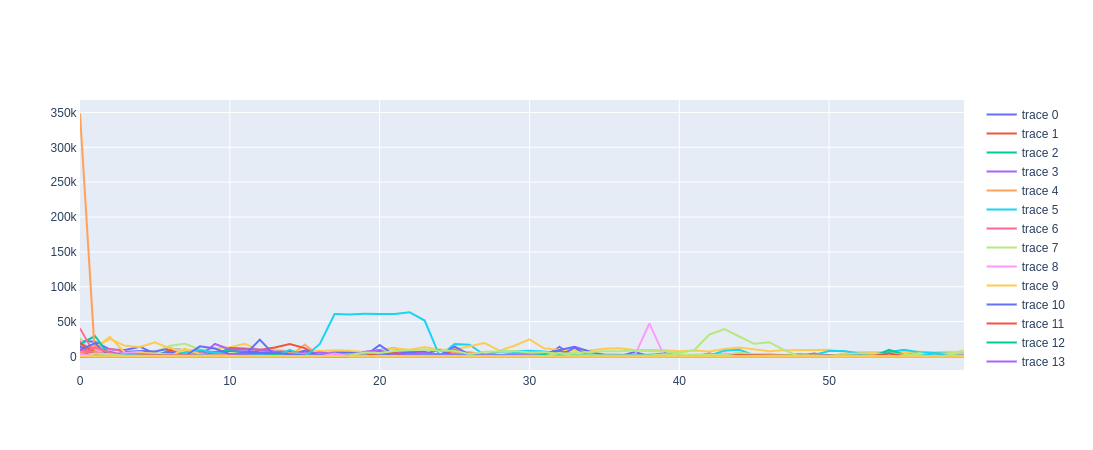

In [22]:
fig = go.Figure()
for col in df_plot_t.columns:
    fig.add_trace(go.Scatter(x=df_plot_t.index, y=df_plot_t[col], mode='lines'))
#fig.update_layout(yaxis_type="log")
fig.show()

fig = go.Figure(data=go.Scatter(x=df_ico_resample_day.index, y=df_ico_resample_day['transactions'], mode='lines'))
#fig.add_trace(go.Scatter(x=df_resample_hours_fraud.index, y=df_resample_hours_fraud['gas'], mode='lines'))
#fig.update_layout(yaxis_type="log")
fig.show()

## 5. Creating the first DNN for our dataset

In [53]:
# Binary Classification with Sonar Dataset: Standardized Larger
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [69]:
pd.DataFrame.from_dict(dict_target, orient='index', columns=['fraud'])

fraud
0X              0
0XCERT          1
4NEW            1
ABULABA         1
AELF            0
...           ...
WAX             0
WAYKICHAIN      0
ZILLIQA         0
ZPAY            1
ZYNECOIN        1

[253 rows x 1 columns]

In [71]:
df_training = df_perc_daily_tsx.T.merge(pd.DataFrame.from_dict(dict_target, orient='index', columns=['fraud']), right_index=True, left_index=True, how='left')
df_training

0       1       2       3       4       5       6       7  \
0X          0.1390  0.2679  0.3285  0.3868  0.4731  0.4980  0.5180  0.5341   
0XCERT      0.1095  0.1870  0.3852  0.4327  0.6890  0.8694  0.8997  0.9021   
4NEW        0.3057  0.4940  0.5153  0.5365  0.5481  0.5552  0.5605  0.5705   
ABULABA     0.2587  0.2776  0.2859  0.3079  0.3147  0.3207  0.3275  0.3313   
AELF        0.0322  0.0391  0.0437  0.0492  0.0554  0.0640  0.0726  0.0791   
...            ...     ...     ...     ...     ...     ...     ...     ...   
WAX         0.0250  0.0370  0.0521  0.0925  0.1072  0.1162  0.1218  0.1257   
WAYKICHAIN  0.0068  0.0131  0.0205  0.0270  0.0336  0.0390  0.0467  0.0558   
ZILLIQA     0.0161  0.1016  0.1649  0.1898  0.2080  0.2256  0.2405  0.2520   
ZPAY        0.4074  0.4083  0.4604  0.4613  0.4894  0.4980  0.5035  0.5056   
ZYNECOIN    0.3577  0.6715  0.6764  0.6837  0.6837  0.6837  0.7178  0.7251   

                 8       9  ...      51      52      53      54      55  \
0X          0.5536  0.5689  ...  0.9525  0.9570  0.9618  0.9690  0.9749   
0XCERT      0.9048  0.9084  ...  0.9889  0.9895  0.9902  0.9935  0.9942   
4NEW        0.5828  0.5897  ...  0.9600  0.9652  0.9696  0.9738  0.9760   
ABULABA     0.3548  0.3676  ...  0.8911  0.8949  0.8994  0.9100  0.9334   
AELF        0.0858  0.0926  ...  0.9562  0.9646  0.9703  0.9741  0.9787   
...            ...     ...  ...     ...     ...     ...     ...     ...   
WAX         0.1567  0.1695  ...  0.8261  0.8467  0.8554  0.8633  0.8718   
WAYKICHAIN  0.0627  0.0693  ...  0.5319  0.5628  0.7460  0.8336  0.8763   
ZILLIQA     0.2664  0.2872  ...  0.8985  0.9097  0.9221  0.9343  0.9448   
ZPAY        0.5071  0.5079  ...  0.9987  0.9990  0.9992  0.9992  0.9994   
ZYNECOIN    0.7251  0.7251  ...  0.8905  0.9002  0.9148  0.9343  0.9440   

                56      57      58   59  fraud  
0X          0.9818  0.9873  0.9930  1.0      0  
0XCERT      0.9947  0.9953  0.9967  1.0      1  
4NEW        0.9791  0.9840  0.9935  1.0      1  
ABULABA     0.9470  0.9622  0.9834  1.0      1  
AELF        0.9856  0.9899  0.9951  1.0      0  
...            ...     ...     ...  ...    ...  
WAX         0.8807  0.9737  0.9922  1.0      0  
WAYKICHAIN  0.9088  0.9317  0.9621  1.0      0  
ZILLIQA     0.9608  0.9701  0.9847  1.0      0  
ZPAY        0.9995  0.9998  0.9999  1.0      1  
ZYNECOIN    0.9513  0.9635  0.9903  1.0      1  

[195 rows x 61 columns]

In [78]:
df_dataset_filtered = df_training[~df_training.fraud.isnull()]#[list(range(0,60))]
df_dataset_filtered.shape

(195, 61)

In [79]:
df_dataset_filtered.head()

0       1       2       3       4       5       6       7  \
0X       0.1390  0.2679  0.3285  0.3868  0.4731  0.4980  0.5180  0.5341   
0XCERT   0.1095  0.1870  0.3852  0.4327  0.6890  0.8694  0.8997  0.9021   
4NEW     0.3057  0.4940  0.5153  0.5365  0.5481  0.5552  0.5605  0.5705   
ABULABA  0.2587  0.2776  0.2859  0.3079  0.3147  0.3207  0.3275  0.3313   
AELF     0.0322  0.0391  0.0437  0.0492  0.0554  0.0640  0.0726  0.0791   

              8       9  ...      51      52      53      54      55      56  \
0X       0.5536  0.5689  ...  0.9525  0.9570  0.9618  0.9690  0.9749  0.9818   
0XCERT   0.9048  0.9084  ...  0.9889  0.9895  0.9902  0.9935  0.9942  0.9947   
4NEW     0.5828  0.5897  ...  0.9600  0.9652  0.9696  0.9738  0.9760  0.9791   
ABULABA  0.3548  0.3676  ...  0.8911  0.8949  0.8994  0.9100  0.9334  0.9470   
AELF     0.0858  0.0926  ...  0.9562  0.9646  0.9703  0.9741  0.9787  0.9856   

             57      58   59  fraud  
0X       0.9873  0.9930  1.0      0  
0XCERT   0.9953  0.9967  1.0      1  
4NEW     0.9840  0.9935  1.0      1  
ABULABA  0.9622  0.9834  1.0      1  
AELF     0.9899  0.9951  1.0      0  

[5 rows x 61 columns]

In [80]:
# load dataset
#dataframe = read_csv("../data_and_models/sonar_all_data.csv", header=None)
dataset = df_dataset_filtered.values
dataset

array([[0.139 , 0.2679, 0.3285, ..., 0.993 , 1.    , 0.    ],
       [0.1095, 0.187 , 0.3852, ..., 0.9967, 1.    , 1.    ],
       [0.3057, 0.494 , 0.5153, ..., 0.9935, 1.    , 1.    ],
       ...,
       [0.0161, 0.1016, 0.1649, ..., 0.9847, 1.    , 0.    ],
       [0.4074, 0.4083, 0.4604, ..., 0.9999, 1.    , 1.    ],
       [0.3577, 0.6715, 0.6764, ..., 0.9903, 1.    , 1.    ]])

In [82]:
# split into input (X) and output (Y) variables
X = dataset[:,:60].astype(float)
Y = dataset[:,60]

In [83]:
X

array([[0.139 , 0.2679, 0.3285, ..., 0.9873, 0.993 , 1.    ],
       [0.1095, 0.187 , 0.3852, ..., 0.9953, 0.9967, 1.    ],
       [0.3057, 0.494 , 0.5153, ..., 0.984 , 0.9935, 1.    ],
       ...,
       [0.0161, 0.1016, 0.1649, ..., 0.9701, 0.9847, 1.    ],
       [0.4074, 0.4083, 0.4604, ..., 0.9998, 0.9999, 1.    ],
       [0.3577, 0.6715, 0.6764, ..., 0.9635, 0.9903, 1.    ]])

In [84]:
Y

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1.])

In [85]:
# Binary Classification with Sonar Dataset: Standardized Larger
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [86]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [87]:
X.shape

(195, 60)

In [88]:
encoded_Y

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [89]:
round(X.shape[0]*0.2)

39

In [90]:
X_valid, X_train = X[:round(X.shape[0]*0.2)], X[round(X.shape[0]*0.2):]
y_valid, y_train = encoded_Y[:round(X.shape[0]*0.2)], encoded_Y[round(X.shape[0]*0.2):]

In [91]:
# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [92]:
model = create_larger()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
_________________________________________________________________


In [93]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))

In [ ]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [95]:
import tensorflow as tf
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)

In [96]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [97]:
model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/100
5/5 [==============================] - 0s 43ms/step - loss: 0.7332 - accuracy: 0.4295 - val_loss: 0.6915 - val_accuracy: 0.6154
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.6788 - accuracy: 0.6026 - val_loss: 0.6834 - val_accuracy: 0.5128
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6708 - accuracy: 0.5833 - val_loss: 0.6860 - val_accuracy: 0.5385
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6699 - accuracy: 0.5833 - val_loss: 0.6843 - val_accuracy: 0.5385
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6652 - accuracy: 0.5833 - val_loss: 0.6746 - val_accuracy: 0.5128
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6613 - accuracy: 0.5897 - val_loss: 0.6680 - val_accuracy: 0.5128
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6594 - accuracy: 0.6026 - val_loss: 0.6641 - val_accuracy: 0.5128
Epoch 8/100
5/5 [===

## Plotting the training metrics

In [98]:
df_training_metrics = pd.DataFrame(history.history)
df_training_metrics.head()

loss  accuracy  val_loss  val_accuracy
0  0.733181  0.429487  0.691461      0.615385
1  0.678811  0.602564  0.683430      0.512821
2  0.670797  0.583333  0.686002      0.538462
3  0.669885  0.583333  0.684250      0.538462
4  0.665249  0.583333  0.674616      0.512821

In [100]:
import matplotlib.pyplot as plt

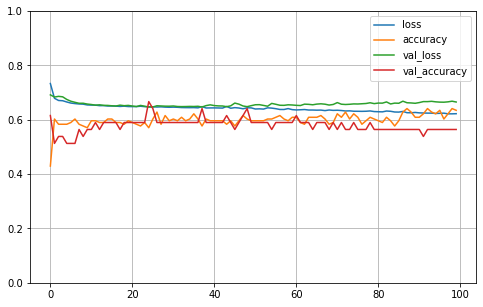

In [101]:
df_training_metrics.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Testing variable learning rate

In [102]:
model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch/20))

In [104]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[lr_schedule])

Epoch 1/100
5/5 [==============================] - 0s 59ms/step - loss: 0.7861 - accuracy: 0.4231 - val_loss: 0.7659 - val_accuracy: 0.4615 - lr: 1.0000e-08
Epoch 2/100
5/5 [==============================] - 0s 24ms/step - loss: 0.7861 - accuracy: 0.4231 - val_loss: 0.7659 - val_accuracy: 0.4615 - lr: 1.1220e-08
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.7861 - accuracy: 0.4231 - val_loss: 0.7659 - val_accuracy: 0.4615 - lr: 1.2589e-08
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7861 - accuracy: 0.4231 - val_loss: 0.7659 - val_accuracy: 0.4615 - lr: 1.4125e-08
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7861 - accuracy: 0.4231 - val_loss: 0.7659 - val_accuracy: 0.4615 - lr: 1.5849e-08
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7861 - accuracy: 0.4231 - val_loss: 0.7659 - val_accuracy: 0.4615 - lr: 1.7783e-08
Epoch 7/100
5/5 [==============================] - 0s 10ms

In [105]:
import matplotlib.pyplot as plt
import numpy as np

[1e-08, 0.001, 0, 50]

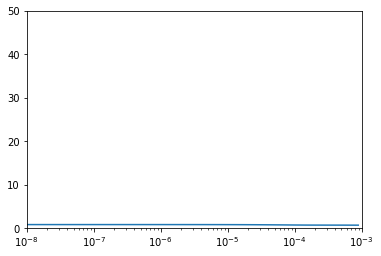

In [106]:
lrs = 1e-8 * (10 ** (np.arange(100) /20))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 1e-3,0,  50])

In [ ]:
## Training with optmized Learning Rate

In [120]:
X_train.shape

(156, 60)

In [127]:
model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=5e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), batch_size=32)#, batch_size=32)

Epoch 1/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.7352 - accuracy: 0.5321 - val_loss: 0.7048 - val_accuracy: 0.5385
Epoch 2/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.6731 - accuracy: 0.5769 - val_loss: 0.6799 - val_accuracy: 0.5128
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6650 - accuracy: 0.5962 - val_loss: 0.6722 - val_accuracy: 0.6154
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.6685 - accuracy: 0.5897 - val_loss: 0.6715 - val_accuracy: 0.5385
Epoch 5/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6610 - accuracy: 0.5962 - val_loss: 0.6748 - val_accuracy: 0.5128
Epoch 6/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6586 - accuracy: 0.6026 - val_loss: 0.6659 - val_accuracy: 0.5385
Epoch 7/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.6583 - accuracy: 0.5833 - val_loss: 0.6589 - val_accuracy: 0.5385
Epoch 8/1000


## Plotting the training metrics

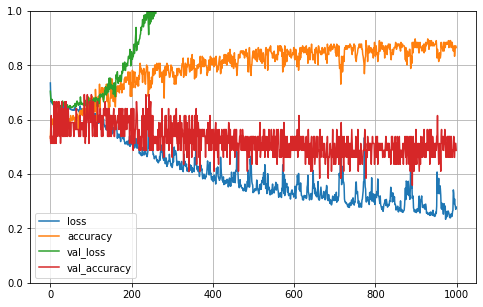

In [128]:
df_training_metrics = pd.DataFrame(history.history)

df_training_metrics.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Best learning rate is around 5e-3.

## Correlation metrics

In [129]:
from typing import List, Tuple, Any, Dict
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


def plot_correlation_matrix(
    dataset: pd.DataFrame,
    list_features: List,
    plot_size: Tuple = (1000, 1000),
) -> None:
    """Plot Pearson Correlation Matrix.

    Parameters
    ----------

    dataset : pd.DataFrame
        Dataframe with features and correlation values.
    
    list_features : list
        List of features to use in plot.
    
    plot_size : Tuple[int, int] (default=(1000, 1000))
        Values for plot size and width in pixels.

    """
    # Define plot size
    width, height = plot_size

    # Generate correlation matrix
    df_corr_matrix = dataset[list(list_features)].corr()

    # Instantiate Plotly Figure
    fig = go.Figure(
        data=go.Heatmap(
            z=df_corr_matrix,
            x=list_features,
            y=list_features,
            xgap=1,
            ygap=1,
            colorbar_thickness=30,
            colorbar_ticklen=3,
            # colorscale="YlOrRd",
        )
    )
    fig.update_layout(
        title_text="Correlation Matrix",
        title_font_family="Arial",
        title_font_size=28,
        title_x=0.5,
        width=width,
        height=height,
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        yaxis_autorange="reversed",
    )
    fig.update_layout(
        hovermode="y",
        hoverlabel=dict(bgcolor="white", font_size=20, font_family="Arial"),
    )

    fig.show()

In [112]:
df_perc_daily_tsx.T

0       1       2       3       4       5       6       7   \
0X          0.1390  0.2679  0.3285  0.3868  0.4731  0.4980  0.5180  0.5341   
0XCERT      0.1095  0.1870  0.3852  0.4327  0.6890  0.8694  0.8997  0.9021   
4NEW        0.3057  0.4940  0.5153  0.5365  0.5481  0.5552  0.5605  0.5705   
ABULABA     0.2587  0.2776  0.2859  0.3079  0.3147  0.3207  0.3275  0.3313   
AELF        0.0322  0.0391  0.0437  0.0492  0.0554  0.0640  0.0726  0.0791   
...            ...     ...     ...     ...     ...     ...     ...     ...   
WAX         0.0250  0.0370  0.0521  0.0925  0.1072  0.1162  0.1218  0.1257   
WAYKICHAIN  0.0068  0.0131  0.0205  0.0270  0.0336  0.0390  0.0467  0.0558   
ZILLIQA     0.0161  0.1016  0.1649  0.1898  0.2080  0.2256  0.2405  0.2520   
ZPAY        0.4074  0.4083  0.4604  0.4613  0.4894  0.4980  0.5035  0.5056   
ZYNECOIN    0.3577  0.6715  0.6764  0.6837  0.6837  0.6837  0.7178  0.7251   

                8       9   ...      50      51      52      53      54  \
0X          0.5536  0.5689  ...  0.9490  0.9525  0.9570  0.9618  0.9690   
0XCERT      0.9048  0.9084  ...  0.9873  0.9889  0.9895  0.9902  0.9935   
4NEW        0.5828  0.5897  ...  0.9509  0.9600  0.9652  0.9696  0.9738   
ABULABA     0.3548  0.3676  ...  0.8858  0.8911  0.8949  0.8994  0.9100   
AELF        0.0858  0.0926  ...  0.9458  0.9562  0.9646  0.9703  0.9741   
...            ...     ...  ...     ...     ...     ...     ...     ...   
WAX         0.1567  0.1695  ...  0.8183  0.8261  0.8467  0.8554  0.8633   
WAYKICHAIN  0.0627  0.0693  ...  0.5070  0.5319  0.5628  0.7460  0.8336   
ZILLIQA     0.2664  0.2872  ...  0.8840  0.8985  0.9097  0.9221  0.9343   
ZPAY        0.5071  0.5079  ...  0.9975  0.9987  0.9990  0.9992  0.9992   
ZYNECOIN    0.7251  0.7251  ...  0.8832  0.8905  0.9002  0.9148  0.9343   

                55      56      57      58   59  
0X          0.9749  0.9818  0.9873  0.9930  1.0  
0XCERT      0.9942  0.9947  0.9953  0.9967  1.0  
4NEW        0.9760  0.9791  0.9840  0.9935  1.0  
ABULABA     0.9334  0.9470  0.9622  0.9834  1.0  
AELF        0.9787  0.9856  0.9899  0.9951  1.0  
...            ...     ...     ...     ...  ...  
WAX         0.8718  0.8807  0.9737  0.9922  1.0  
WAYKICHAIN  0.8763  0.9088  0.9317  0.9621  1.0  
ZILLIQA     0.9448  0.9608  0.9701  0.9847  1.0  
ZPAY        0.9994  0.9995  0.9998  0.9999  1.0  
ZYNECOIN    0.9440  0.9513  0.9635  0.9903  1.0  

[195 rows x 60 columns]

In [113]:
df_perc_daily_tsx = pd.DataFrame(dict_perc_daily_transactions_60)

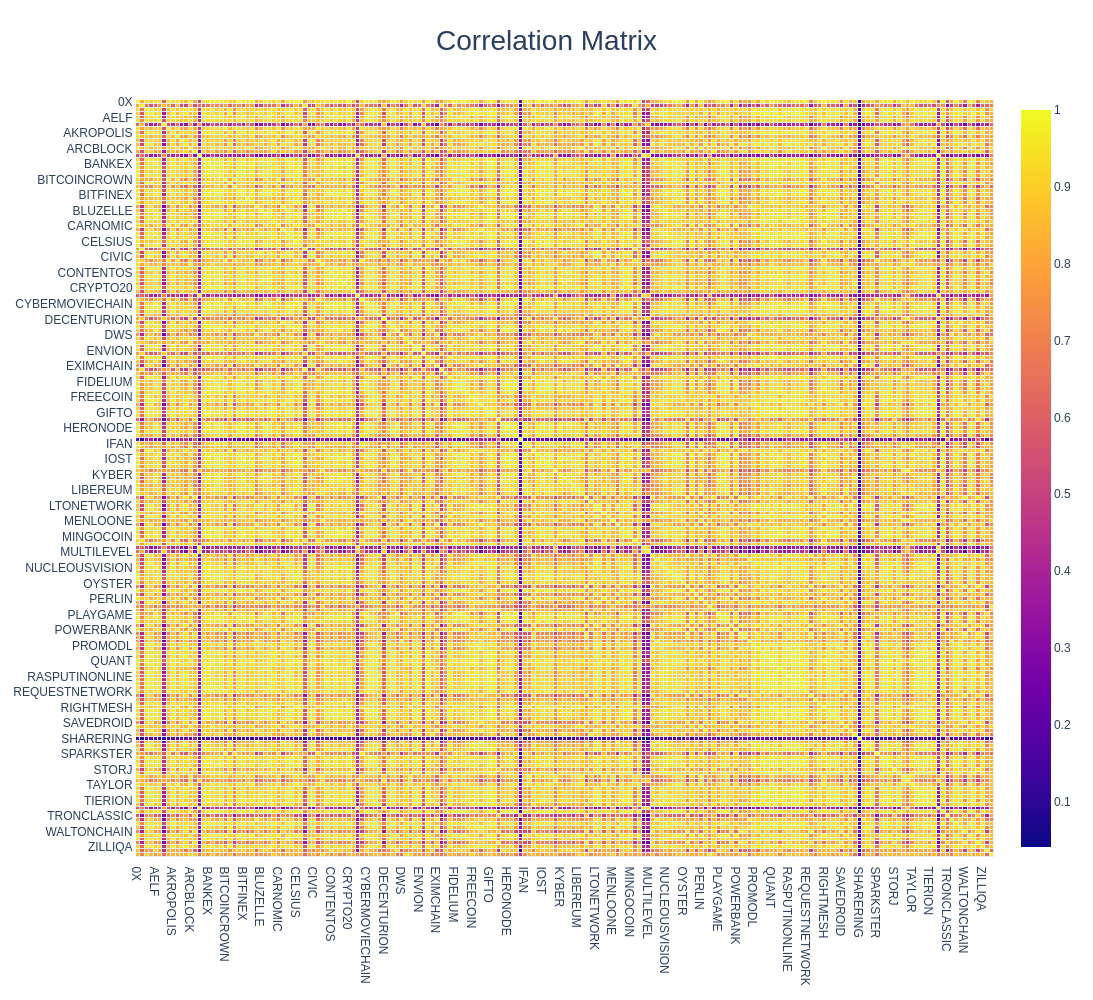

In [114]:
plot_correlation_matrix(df_perc_daily_tsx, df_perc_daily_tsx.columns)

In [ ]:
Ideias para plot




